In [ ]:
#alignment
# -> global dan local

#similiarity
# -> levenshtein and hamming

In [1]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq

In [23]:
seqA = Seq('AGCTAGATCGATCGAACTAGCTAGCTACGATCGAT')
seqB = Seq('GCATAAGCTAGCGCGCTAGCGATCGAAT')

# global_align = pairwise2.align.globalxx(seqA, seqB) #klo mau score doang tambah arg score_only=True
# global_align = pairwise2.align.globalmx(seqA, seqB, 2, -1) #match, miss
# global_align = pairwise2.align.globalms(seqA, seqB, 2, -1, -2, -1) #match, miss, open-gap, extend-gap
# print(format_alignment(*global_align[0]))

# local_align = pairwise2.align.localxx(seqA, seqB)
local_align = pairwise2.align.localms(seqA, seqB, 2, -1, -2, -1, score_only=True)

print(local_align)
# print(format_alignment(*local_align[0]))

31.0


In [9]:
def hamming(seq1, seq2):
    return len([(x,y) for x,y in zip(seq1, seq2) if x != y])

seqHamA = Seq('ACCCC')
seqHamB = Seq('AGGGG')

hamming(seqHamA, seqHamB)

4

In [10]:
from Levenshtein import distance

seqLevA = Seq('ACGATCGGATCGATCGAGAGATCGAGATCGAT')
seqLevB = Seq('CGATCGATCGAGATCGAGATCGAGCTAGATC')

distance(seqLevA, seqLevB)

9

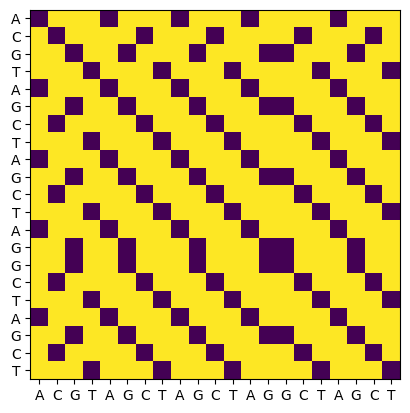

In [19]:
def diff(x, y):
    return 0 if x == y else 1

def M(seq1, seq2, i, j, k):
    return sum(diff(x, y) for x, y in zip(seq1[i:i+k], seq2[j:j+k]))

def makeMatrix(seq1, seq2, k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1, seq2, i, j, k) for j in range(m-k+1)] for i in range(n-k+1)]

def plot(M, t, seq1, seq2, nonBlank = chr(0x25A0), blank=' '):
    print(" |", seq2)
    print('-'*(2+len(seq2)))

    for label, row in zip(seq1, M):
        line = ''.join(nonBlank if s < t else blank for s in row)
        print(label + "|" + line)

def dotplot(seq1, seq2, k=1, t=1):
    M = makeMatrix(seq1, seq2, k)
    plot(M, t, seq1, seq2)

seqDotA = Seq("ACGTAGCTAGCTAGGCTAGCT")
seqDotB = Seq("ACGTAGCTAGCTAGGCTAGCT")


import matplotlib.pyplot as plt
import numpy as np

def dotPlotFancy(seq1, seq2):
    plt.imshow(np.array(makeMatrix(seq1, seq2, 1)))
    xt = plt.xticks(np.arange(len(list(seq2))), list(seq2))
    yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))

    plt.show()

dotPlotFancy(seqDotA, seqDotB)
# dotplot(seqDotA, seqDotB)